# Part 3: Linear Regression

This notebook contains the process and results for Part 3 of the second assignment for cp322.

In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from functional import seq
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

## Load Datasets

Datasets are loaded from the datasets folder. This folder can be modified by specifying a new value for the `datasets` variable.

In [2]:
# load datasets
datasets = "../datasets"

train_inputs = pd.read_csv(f"{datasets}/p3_train_inputs.csv", header=None)
train_targets = pd.read_csv(f"{datasets}/p3_train_targets.csv", header=None)
test_inputs = pd.read_csv(f"{datasets}/p3_test_inputs.csv", header=None)
test_targets = pd.read_csv(f"{datasets}/p3_test_targets.csv", header=None)

## Visualize Dataset

The dataset is plotted using a simple 3D scatter plot.

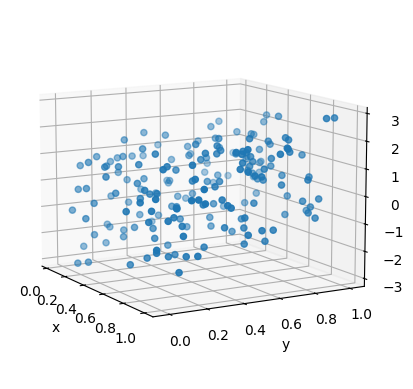

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(11, -30, 0)
ax.scatter(train_inputs[0], train_inputs[1], train_targets[0])

plt.show()

## Model Implementation

The training data is split into training and test data, then used to train and test the model, where the mean squared error is determined.

In [4]:
def gradient_descent_mse(learning_rate: float) -> float:
    """
    Trains a SGDRegressor model, tests against external data then returns the mean squared error.

    :param learning_rate: Learning rate for the gradient descent.
    :return: The mean squared error of the model over the training data.
    """
    kf = KFold(n_splits=10, shuffle=True)
    result = next(kf.split(train_inputs), None)

    splitTrainingInputs = train_inputs.iloc[result[0]]
    splitTrainingTargets = train_targets.iloc[result[0]]
    splitTestInputs = train_inputs.iloc[result[1]]
    splitTestTargets = train_targets.iloc[result[1]]

    model: SGDRegressor = SGDRegressor(learning_rate="constant", eta0=learning_rate)
    model.fit(splitTrainingInputs, splitTrainingTargets.values.ravel())
    predictions = model.predict(splitTestInputs)
    mse = mean_squared_error(splitTestTargets, predictions)

    return mse


## Create Models & Graph Results

The models are all created, trained, and tested, then the determined mean square error is returned and put into a dataframe. Once all the data has been gathered, it is graphed.

<Axes: xlabel='Learning Rate'>

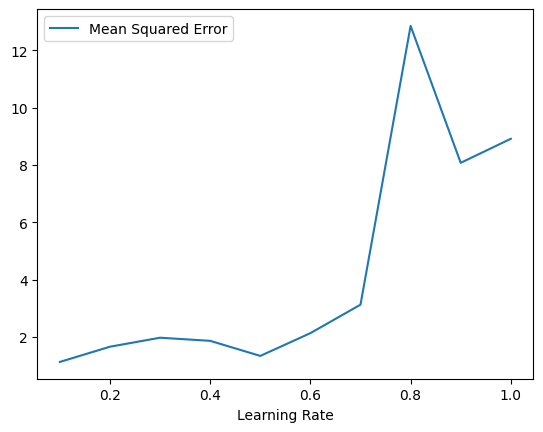

In [5]:
lr_mse = np.zeros((10, 2))
lr_mse[:,0] = np.array([i / 10 for i in range(1, 11, 1)])

# Convert `lr_mse` to a stream, map the stream to a stream of tuples as (learning_rate, mse), then convert the result to a dataframe.
results_df = seq(lr_mse).map(lambda x: (x[0], gradient_descent_mse(x[0]))).to_pandas(["Learning Rate", "Mean Squared Error"])

results_df.plot(x="Learning Rate", y="Mean Squared Error")

In [6]:
leastError, leastMse = results_df.sort_values(by=["Mean Squared Error"], ascending=True).iloc[0]
print(f"Learning rate with least error: {leastError}")
print(f"Mean Squared Error: {leastMse}")

Learning rate with least error: 0.1
Mean Squared Error: 1.1287333750038653


In [7]:
modelLeastError = SGDRegressor(learning_rate="constant", eta0=leastError)
modelLeastError.fit(train_inputs, train_targets.values.ravel())
finalPred = modelLeastError.predict(test_inputs)
finalMse = mean_squared_error(test_targets, finalPred)

print(f"Test mean squared error based on best learning rate: {finalMse}")

Test mean squared error based on best learning rate: 1.4107653842892314
